# Лабораторная работа №2. Визуализация данных, зависимостей между признаками и целевой переменной

In [75]:
import numpy as np
import pandas as pd

In [76]:
with open("datasets\\brooklyn_sales_map.csv") as f:
    ncols = len(f.readline().split(','))

sales_data = pd.read_csv(filepath_or_buffer="datasets\\brooklyn_sales_map.csv",
                            usecols=range(1,ncols),
                            index_col="zip_code",
                            low_memory=False)

In [77]:
chosing = pd.DataFrame(data=[sales_data.dtypes, 
                             sales_data.isna().sum(), 
                             sales_data.isin([0]).sum(), 
                             sales_data.nunique(), 
                             sales_data.count()]).transpose()
chosing.rename(columns={0:'types', 
                        1:'NaN', 
                        2:'0', 
                        3:'unique', 
                        4:'count'}, inplace=True)

In [78]:
chosing.head(110)

,types,NaN,0,unique,count
borough,int64,0,0,1,390883
neighborhood,object,0,0,64,390883
building_class_category,object,83,0,88,390800
tax_class,object,6934,0,10,383949
block,int64,0,0,7069,390883
lot,int64,0,0,2753,390883
easement,float64,390883,0,0,0
building_class,object,6934,0,183,383949
address,object,1,0,226076,390882
apartment_number,object,305267,0,5734,85616


In [79]:
sales_data_analys = sales_data.loc[:, ['neighborhood',
                                        'tax_class', 
                                        'total_units', 
                                        'year_built', 
                                        'sale_price', 
                                        'sale_date', 
                                        'SchoolDist', 
                                        'HealthArea',
                                        'LandUse', 
                                        'OwnerType',
                                        'NumFloors']].copy()
sales_data_analys.dropna(inplace=True)

In [80]:
sales_data_analys.head()

,neighborhood,tax_class,total_units,year_built,sale_price,sale_date,SchoolDist,HealthArea,LandUse,OwnerType,NumFloors
zip_code,,,,,,,,,,,
11201,DOWNTOWN-FULTON FERRY,4,0,0,345000000.0,2016-12-20,13.0,1000.0,10.0,P,0.0
11201,BROOKLYN HEIGHTS,4,1,1927,202500000.0,2017-10-31,13.0,2300.0,8.0,X,15.0
11241,BROOKLYN HEIGHTS,4,102,1928,171000000.0,2017-10-10,13.0,2300.0,5.0,P,37.0
11211,WILLIAMSBURG-NORTH,2,237,2012,169000000.0,2015-05-01,14.0,700.0,3.0,P,6.0
11205,NAVY YARD,4,1,1912,161000000.0,2016-03-04,14.0,9300.0,6.0,P,8.0


In [81]:
sales_data_analys['sale_date'] = pd.to_datetime(sales_data_analys['sale_date'], format='%Y/%m/%d')

In [82]:
sales_data_analys['tax_class'].unique()

array(['4', '2', '2B', '1B', '1', '2A', '2C', '3'], dtype=object)

In [83]:
tax_class = {'4':8, '2':3, '2B':5, 
            '1B':2, '1':1, '2A':4, 
            '2C':6, '3':7}
sales_data_analys['tax_class'] = sales_data_analys['tax_class'].map(tax_class)

In [84]:
sales_data_analys['OwnerType'].unique()

array(['P', 'X', 'O', 'M', 'C'], dtype=object)

In [85]:
sales_data_analys = pd.get_dummies(sales_data_analys, columns = ["OwnerType"])

In [86]:
sales_data_analys.head()

,neighborhood,tax_class,total_units,year_built,sale_price,sale_date,SchoolDist,HealthArea,LandUse,NumFloors,OwnerType_C,OwnerType_M,OwnerType_O,OwnerType_P,OwnerType_X
zip_code,,,,,,,,,,,,,,,
11201,DOWNTOWN-FULTON FERRY,8,0,0,345000000.0,2016-12-20,13.0,1000.0,10.0,0.0,0,0,0,1,0
11201,BROOKLYN HEIGHTS,8,1,1927,202500000.0,2017-10-31,13.0,2300.0,8.0,15.0,0,0,0,0,1
11241,BROOKLYN HEIGHTS,8,102,1928,171000000.0,2017-10-10,13.0,2300.0,5.0,37.0,0,0,0,1,0
11211,WILLIAMSBURG-NORTH,3,237,2012,169000000.0,2015-05-01,14.0,700.0,3.0,6.0,0,0,0,1,0
11205,NAVY YARD,8,1,1912,161000000.0,2016-03-04,14.0,9300.0,6.0,8.0,0,0,0,1,0


In [87]:
sales_data_analys.dtypes

neighborhood            object
tax_class                int64
total_units              int64
year_built               int64
sale_price             float64
sale_date       datetime64[ns]
SchoolDist             float64
HealthArea             float64
LandUse                float64
NumFloors              float64
OwnerType_C              uint8
OwnerType_M              uint8
OwnerType_O              uint8
OwnerType_P              uint8
OwnerType_X              uint8
dtype: object

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import expon, norm

In [89]:
sales_data_analys.shape[0]

52973

C:\Users\mishk\AppData\Local\Temp/ipykernel_17312/1517028765.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data_analys['HealthArea'], bins = 10)


<AxesSubplot:xlabel='HealthArea', ylabel='Density'>

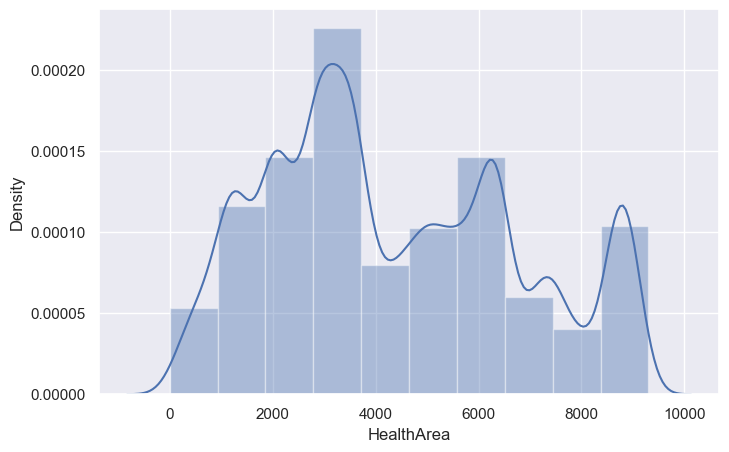

In [91]:
sns.set(rc={'figure.figsize':(8,5)})
sns.distplot(sales_data_analys['HealthArea'], bins = 10)

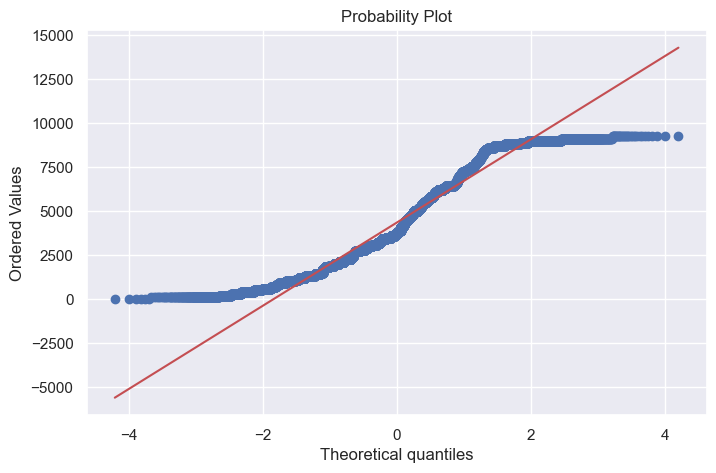

In [92]:
fig = plt.figure(figsize=(8,5))
res = stats.probplot(sales_data_analys['HealthArea'], plot = plt)

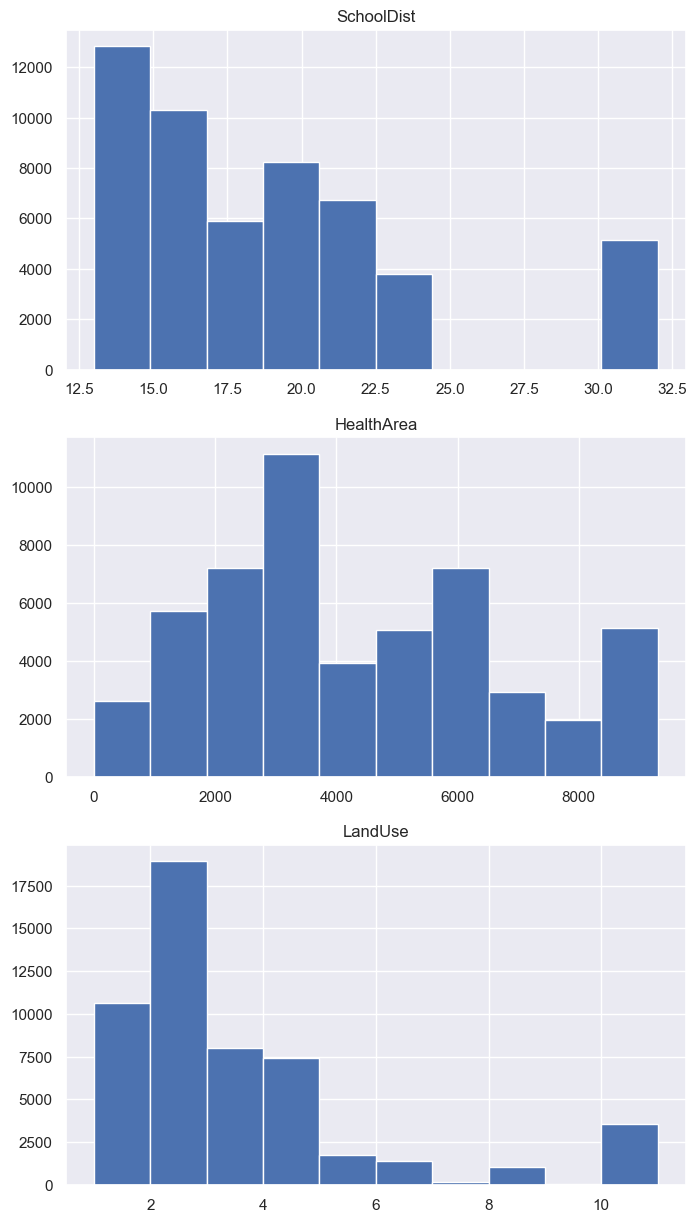

In [94]:
fig, axs = plt.subplots(3, figsize=(8,15))
columns = ['SchoolDist', 'HealthArea', 'LandUse']

for i in range(len(columns)):
    axs[i].title.set_text(columns[i])
    sales_data_analys[columns[i]].hist(ax=axs[i], bins=10)

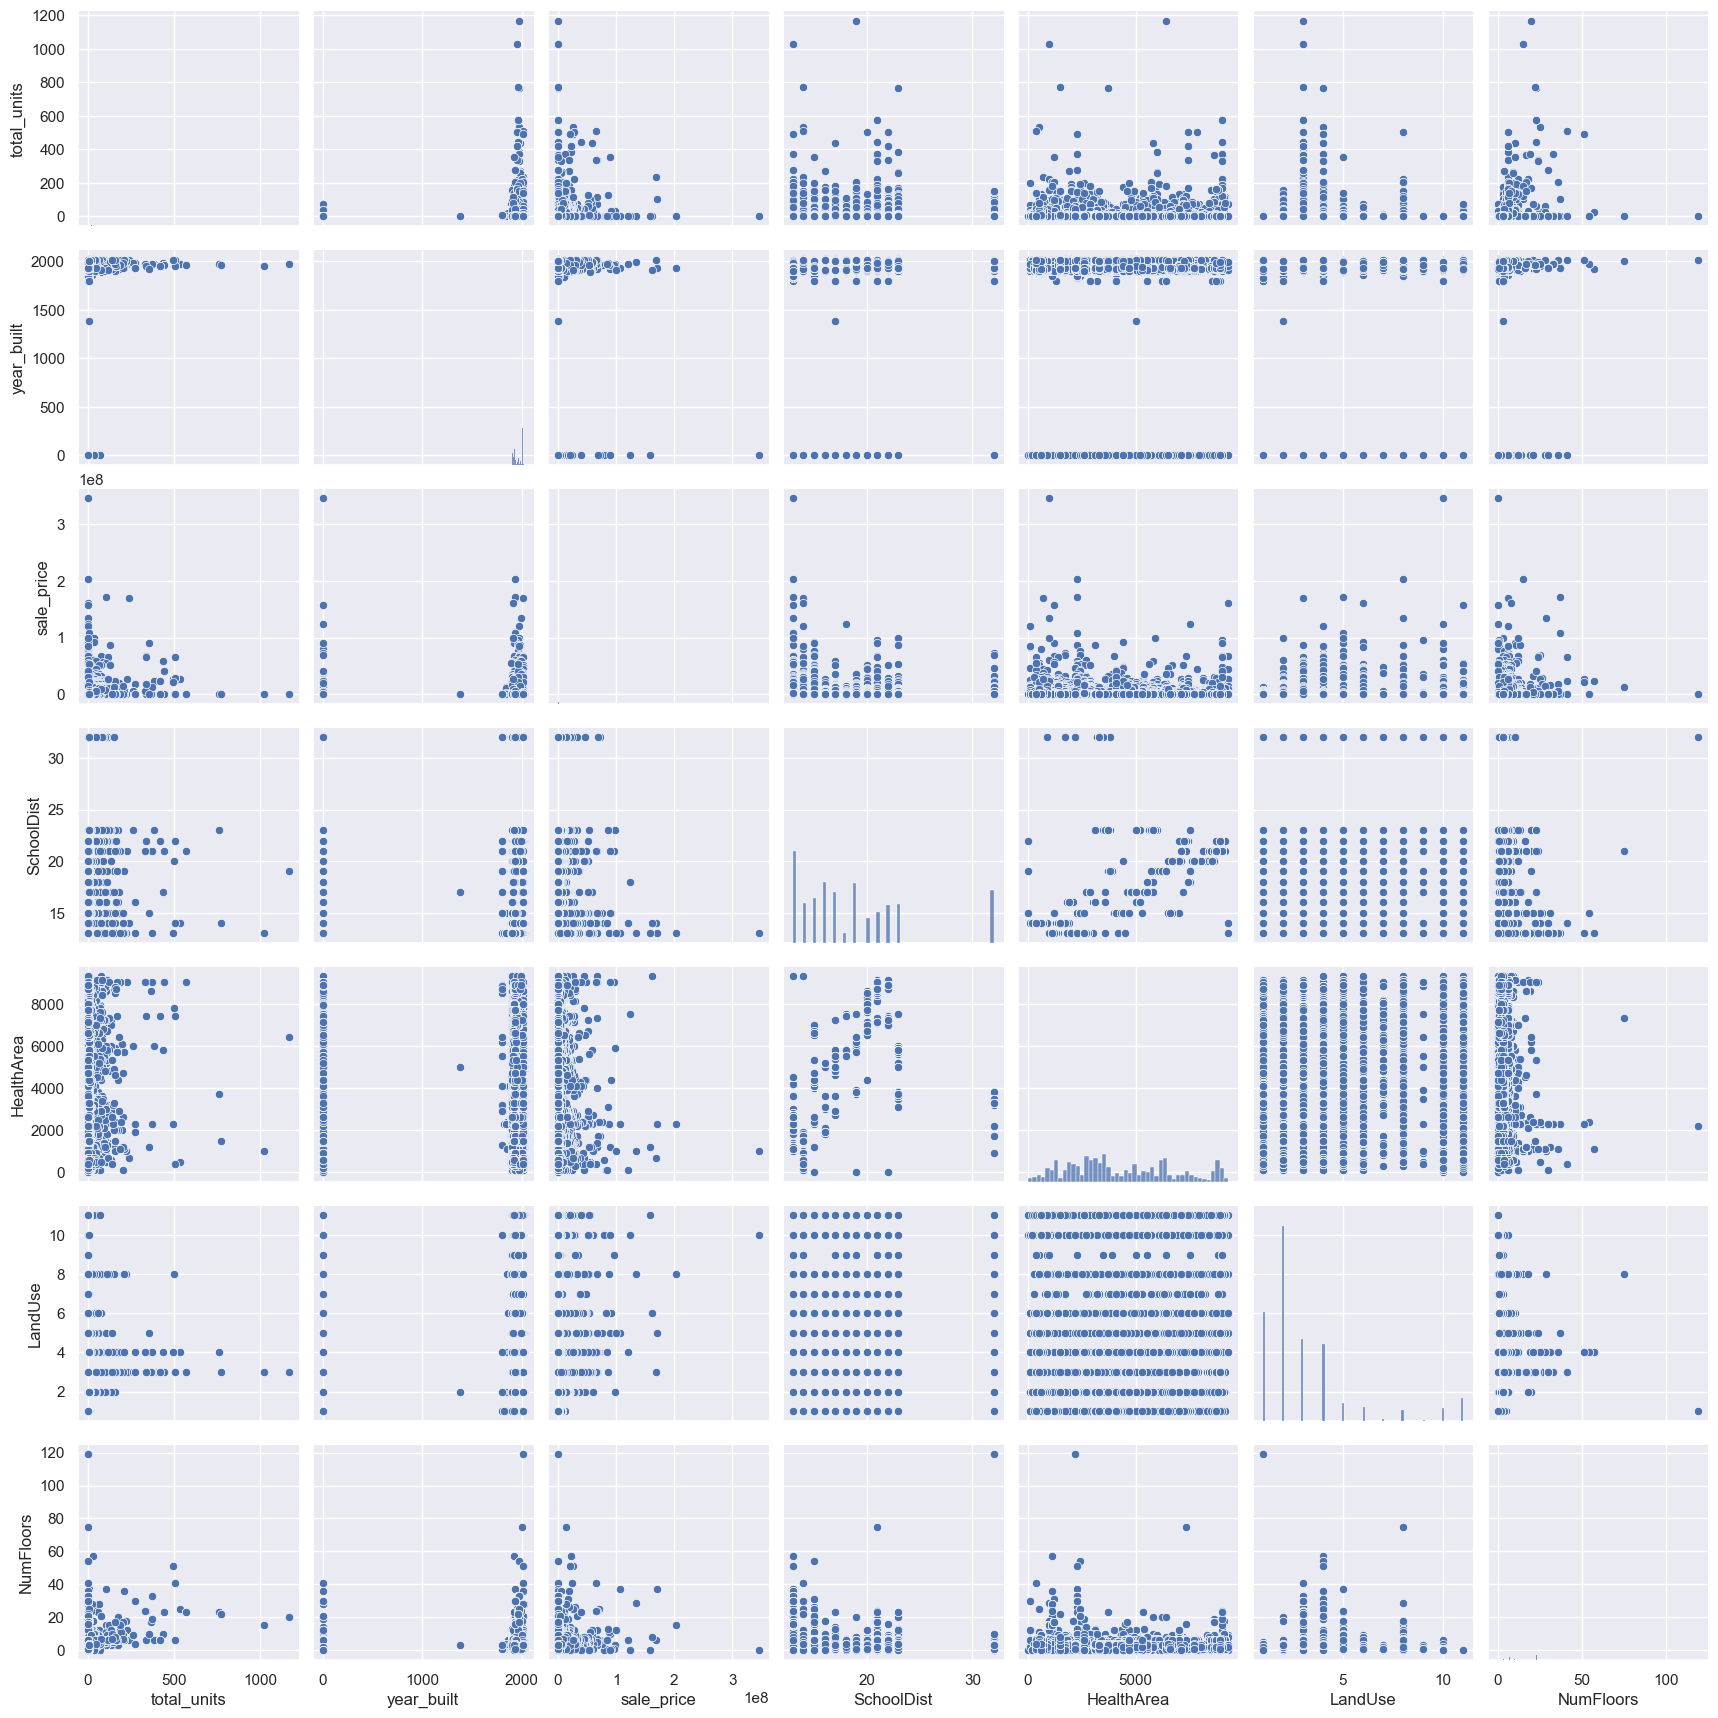

In [95]:
sns.pairplot(sales_data_analys.drop(['neighborhood', 
                                      'tax_class', 
                                      'sale_date', 
                                      'OwnerType_C', 
                                      'OwnerType_M', 
                                      'OwnerType_O', 
                                      'OwnerType_P', 
                                      'OwnerType_X'],axis=1))

<AxesSubplot:>

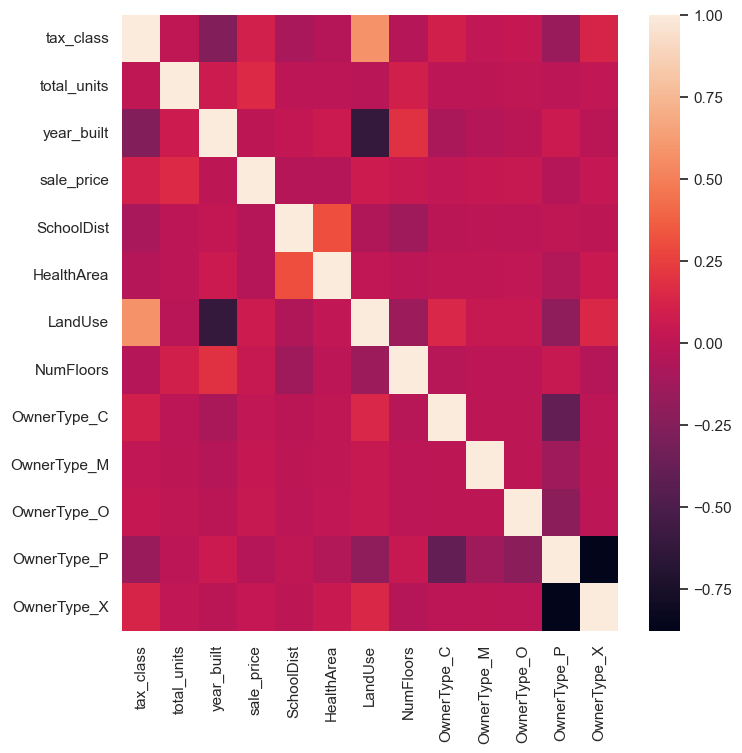

In [120]:
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(sales_data_analys.drop(['neighborhood', 'sale_date'], axis=1).corr())

<AxesSubplot:>

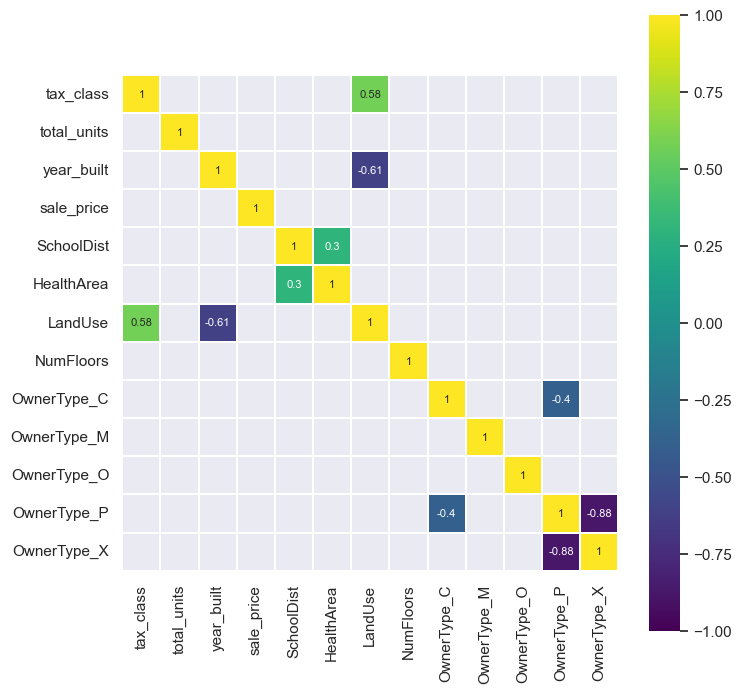

In [119]:
corr = sales_data_analys.drop(['neighborhood', 'sale_date'], axis = 1).corr()
plt.figure(figsize = (8,8))

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)],
           cmap = 'viridis', vmax = 1.0, vmin = -1.0, linewidths = 0.1,
           annot=True, annot_kws = {"size": 8}, square = True)

<AxesSubplot:xlabel='tax_class', ylabel='HealthArea'>

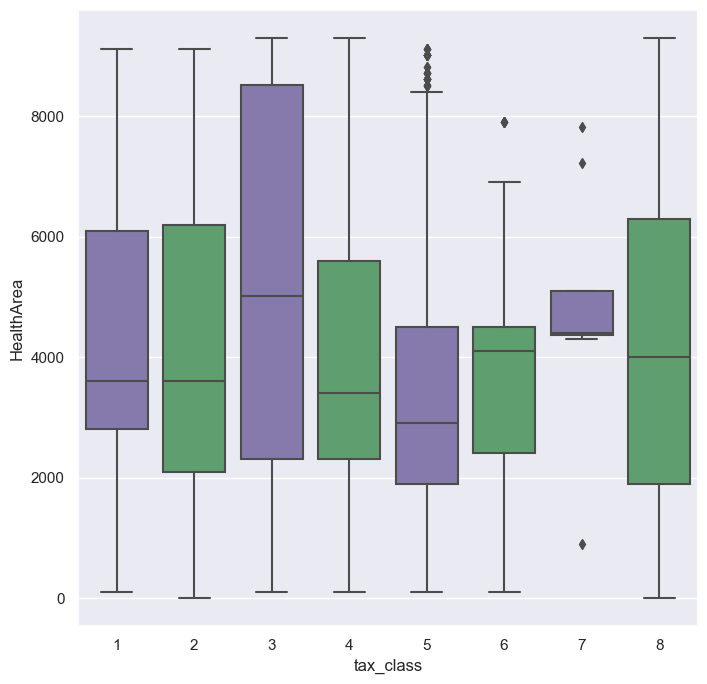

In [117]:
sns.set(rc={'figure.figsize':(8,8)})

sns.boxplot(x = "tax_class", y = "HealthArea", palette = ["m", "g"], data=sales_data_analys)

Text(0.5, 1.0, 'Количество сделок по каждому из планов налогобложения (налога на имущество)')

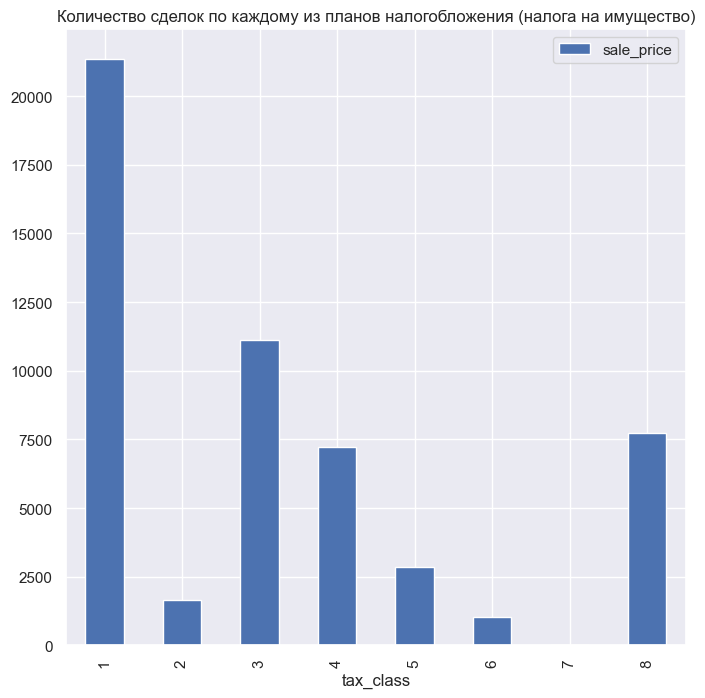

In [118]:
icu = sales_data_analys.groupby('tax_class').count()
icu.plot(kind='bar', y='sale_price')
plt.title('Количество сделок по каждому из планов налогобложения (налога на имущество)')